Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                  
─────────(Expectation(CVD|SYSBP,DIABP))
d[BPMEDS]                              
Estimand assumption 1, Unconfoundedness: If U→{BPMEDS} and U→CVD then P(CVD|BPMEDS,SYSBP,DIABP,U) = P(CVD|BPMEDS,SYSBP,DIABP)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



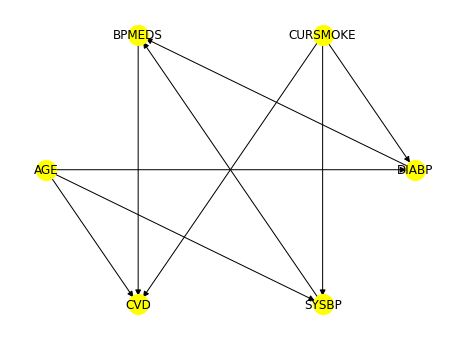

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

df = pd.read_csv("../data/data.csv")
model = CausalModel(
    data=df,
    treatment='BPMEDS',
    outcome='CVD',
    graph="digraph {AGE -> CVD;AGE -> SYSBP;AGE -> DIABP;CURSMOKE->CVD;CURSMOKE->DIABP;CURSMOKE->SYSBP;SYSBP->BPMEDS;DIABP->BPMEDS;BPMEDS->CVD}"
)
model.view_model()
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

In [25]:
df.dropna(subset=["AGE", "SYSBP", "DIABP", "CURSMOKE", "BPMEDS", "CVD"], inplace=True)
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",
                                 target_units="att")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                  
─────────(Expectation(CVD|DIABP,SYSBP))
d[BPMEDS]                              
Estimand assumption 1, Unconfoundedness: If U→{BPMEDS} and U→CVD then P(CVD|BPMEDS,DIABP,SYSBP,U) = P(CVD|BPMEDS,DIABP,SYSBP)

## Realized estimand
b: CVD~BPMEDS+DIABP+SYSBP
Target units: att

## Estimate
Mean value: 0.06383820049959704



In [26]:
refutation = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter",
                                   placebo_type="permute", num_simulations=2)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.06383820049959704
New effect:-0.008820116159556218
p value:0.013763919708594585

